In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
import scipy.stats as stats  #for the statistical tests
from scipy import stats as stats

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [2]:
claims=pd.read_csv(r"C:\Users\Joyal\Desktop\Data Analytics\Python\Case study\Completed\Case Study 3 - Insurance Claims Case Study\claims.csv")

In [3]:
cust=pd.read_csv(r"C:\Users\Joyal\Desktop\Data Analytics\Python\Case study\Completed\Case Study 3 - Insurance Claims Case Study\cust_demographics.csv")

In [4]:
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [5]:
cust.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


## 1 . Import datsets which is provided to you and combine dataseta


In [6]:
merged_data = claims.merge(cust, left_on='customer_id', right_on='CUST_ID', how='inner')

# Dropping redundant column
merged_data.drop('CUST_ID', axis=1, inplace=True)

merged_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,Female,01-May-86,MA,413-187-7945,Silver


## 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.
  e.

In [7]:
merged_data.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

### Both claim_date and DateOfBirth should be Datetime datatype.claim_amount should be float64

In [8]:
#converting Both claim_date and DateOfBirth columns to datetime format
merged_data['claim_date'] = pd.to_datetime(merged_data['claim_date'])
merged_data['DateOfBirth'] = pd.to_datetime(merged_data['DateOfBirth'], format='%d-%b-%y')



## 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.


In [9]:
# Replace 'NA' with np.nan
merged_data['claim_amount'] = merged_data['claim_amount'].replace('NA', np.nan)

# Remove the '$' sign, strip leading/trailing spaces, and convert to float
merged_data['claim_amount'] = merged_data['claim_amount'].str.replace('$', '').str.strip().str.replace(',', '').astype(float)

In [10]:
merged_data.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
dtype: object

## 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [11]:
# Define a function to apply to each row of the dataframe
def flag_unreported_injury_claims(row):
    if row['police_report'] == 'No' and row['claim_type'] in ['Material and injury', 'Injury only']:
        return 1
    else:
        return 0

# Create the new column by applying the function
merged_data['alert_flag'] = merged_data.apply(flag_unreported_injury_claims, axis=1)

In [12]:
merged_data.head(10)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,0
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,0
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0
6,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,956-871-8691,Gold,0
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,Male,1977-05-13,NV,956-871-8691,Gold,0
8,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,Male,1977-05-17,NH,419-712-8513,Gold,1
9,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,Male,1977-05-17,NH,419-712-8513,Gold,0


## 5.One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records inthe data based on the customer ID column.

In [13]:
# Sort by 'claim_date'
merged_data = merged_data.sort_values('claim_date')

# Drop duplicates based on 'customer_id', keep the last observation
merged_data = merged_data.drop_duplicates('customer_id', keep='last')

## 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [14]:
# Check for missing values
print(merged_data.isna().sum())

# Impute missing values
for column in merged_data.columns:
    if np.issubdtype(merged_data[column].dtype, np.number) and column != 'total_policy_claims':
        merged_data[column] = merged_data[column].fillna(merged_data[column].mean())  # mean for continuous variables
    else:
        merged_data[column] = merged_data[column].fillna(merged_data[column].mode()[0])  # mode for categorical variables

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
alert_flag              0
dtype: int64


## 7. Calculate the age of customers in years.Categorize Children less than 18 , youth 18 to 30, adult 30 to 60 and seniors r > 60

In [18]:

# Calculating the age of customers in years
merged_data['age'] = (merged_data['claim_date'] - merged_data['DateOfBirth']).dt.days // 365

# Categorizing customers based on age
merged_data['age_category'] = pd.cut(merged_data['age'], bins=[0, 18, 30, 60, float('inf')], labels=['Children', 'Youth', 'Adult', 'Senior'])

# Displaying the updated dataframe
merged_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_category
739,58878919,29323970,Driver error,2017-01-01,Auto,Unknown,Material only,1840.0,1,Yes,Male,1971-03-03,NE,783-653-9163,Gold,0,45,Adult
181,90591192,61745840,Other driver error,2017-01-01,Home,No,Material and injury,30930.0,1,No,Female,1994-07-24,MA,612-684-5472,Platinum,1,22,Youth
312,9476314,65176092,Other causes,2017-01-01,Auto,No,Material and injury,37290.0,3,No,Male,1975-11-23,NC,651-379-2486,Silver,1,41,Adult
905,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1,No,Female,1993-08-13,TN,396-973-2531,Gold,1,23,Youth
120,39131766,39587790,Other causes,2017-01-01,Auto,No,Material only,2967.0,1,Yes,Male,2065-01-10,LA,615-154-3516,Gold,0,-49,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,98795403,38011078,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1,No,Female,1976-05-20,NE,271-123-1475,Gold,0,42,Adult
286,99775483,93915431,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1,Yes,Male,2067-09-08,ME,134-785-1687,Gold,1,-49,NaN
226,49735712,17682060,Crime,2018-10-30,Home,Unknown,Material and injury,17020.0,1,No,Female,1974-11-21,NV,186-195-3465,Gold,0,43,Adult
1077,91386759,65208809,Natural causes,2018-10-30,Auto,No,Material only,2290.0,1,No,Male,2064-04-22,VA,286-128-6132,Platinum,0,-46,NaN


 ## 8.What is the average amount claimed by the customers from various segments?

In [19]:
# Calculating the average amount claimed by the customers from various segments
average_claim_amount = merged_data.groupby('Segment')['claim_amount'].mean()

# Displaying the average amount claimed by the customers from various segments
print(average_claim_amount)

Segment
Gold        12846.400227
Platinum    12371.654843
Silver      12267.859374
Name: claim_amount, dtype: float64


## 9.What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [20]:
# Define the cutoff date
cutoff_date1 = '2018-10-01'
cutoff_date1= pd.Timestamp(cutoff_date1) - pd.DateOffset(days=20)

# Filter data for claims at least 20 days prior to 1st of October, 2018
filtered_data = merged_data[merged_data['claim_date'] < cutoff_date1]

# Calculate total claim amount based on incident cause
total_claim_amount = filtered_data.groupby('incident_cause')['claim_amount'].sum()

# Print the result
print(total_claim_amount)


incident_cause
Crime                 7.219386e+05
Driver error          3.315851e+06
Natural causes        1.312987e+06
Other causes          3.723152e+06
Other driver error    3.277536e+06
Name: claim_amount, dtype: float64


## 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [21]:
# Filter data for adults from TX, DE and AK who claimed insurance for driver related issues and causes
filtered_data = merged_data[(merged_data['age_category'] == 'Adult') &
                            (merged_data['State'].isin(['TX', 'DE', 'AK'])) &
                            (merged_data['incident_cause'].str.contains('driver', case=False))]

# Count the number of such claims
num_claims = filtered_data.shape[0]

print(num_claims)


16


## 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

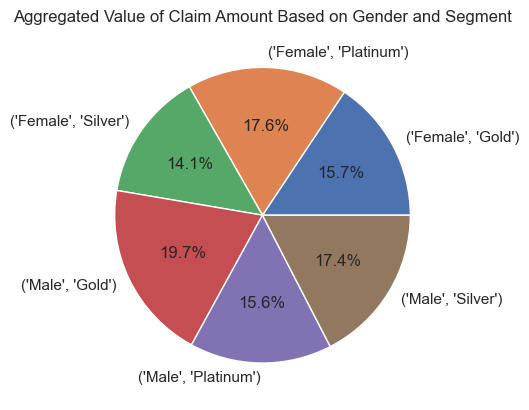

In [22]:
# Aggregate claim amount based on gender and segment
agg_claim_amount = merged_data.groupby(['gender', 'Segment'])['claim_amount'].sum()

# Calculate percentage
claim_percentage = agg_claim_amount / agg_claim_amount.sum() * 100

# Draw pie chart
fig, ax = plt.subplots()
ax.pie(claim_percentage, labels=claim_percentage.index, autopct='%1.1f%%')
plt.title('Aggregated Value of Claim Amount Based on Gender and Segment')

plt.show()

## 12. Among males and females, which gender had claimed the most for any type of driver related issues?

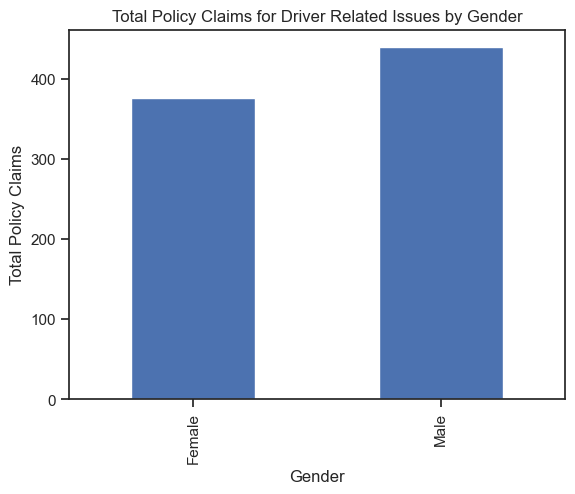

In [23]:
# Filter data for driver related issues
filtered_data = merged_data[merged_data['incident_cause'].str.contains('driver', case=False)]

# Aggregate total policy claims based on gender
agg_policy_claims = filtered_data.groupby('gender')['total_policy_claims'].sum()

# Draw bar chart
agg_policy_claims.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Total Policy Claims')
plt.title('Total Policy Claims for Driver Related Issues by Gender')
plt.show()


## 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

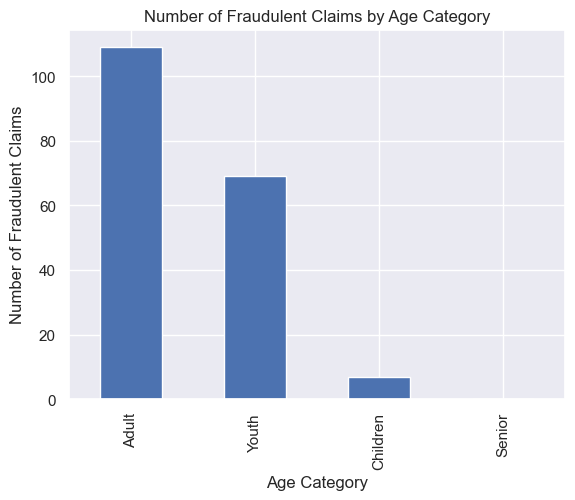

In [24]:
# Set seaborn style
sns.set(style="darkgrid")

# Filter data for fraudulent claims
fraudulent_claims = merged_data[merged_data['fraudulent'] == 'Yes']

# Count the number of fraudulent claims for each age group
fraud_counts = fraudulent_claims['age_category'].value_counts()

# Draw bar chart
fraud_counts.plot(kind='bar')
plt.xlabel('Age Category')
plt.ylabel('Number of Fraudulent Claims')
plt.title('Number of Fraudulent Claims by Age Category')
plt.show()

## 14. Visualize the monthly trend of the total amount that has been claimed by the customers

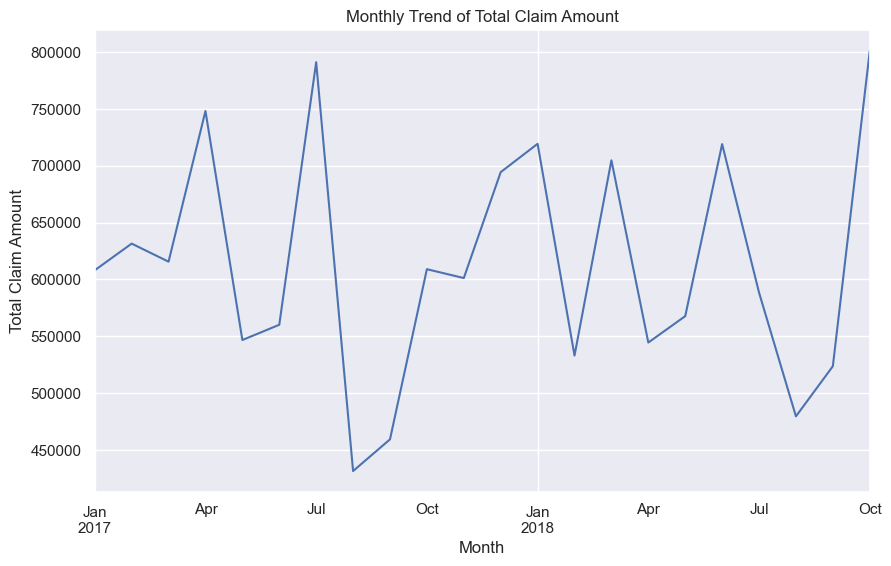

In [25]:

# Extract month and year from 'claim_date'
merged_data['claim_month_year'] = merged_data['claim_date'].dt.to_period('M')

# Aggregate claim amount based on month and year
agg_claim_amount = merged_data.groupby('claim_month_year')['claim_amount'].sum()

# Set figure size
plt.figure(figsize=(10, 6))

# Draw line chart
agg_claim_amount.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Total Claim Amount')
plt.title('Monthly Trend of Total Claim Amount')
plt.show()



## 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

C:\Users\Joyal\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Joyal\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Joyal\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

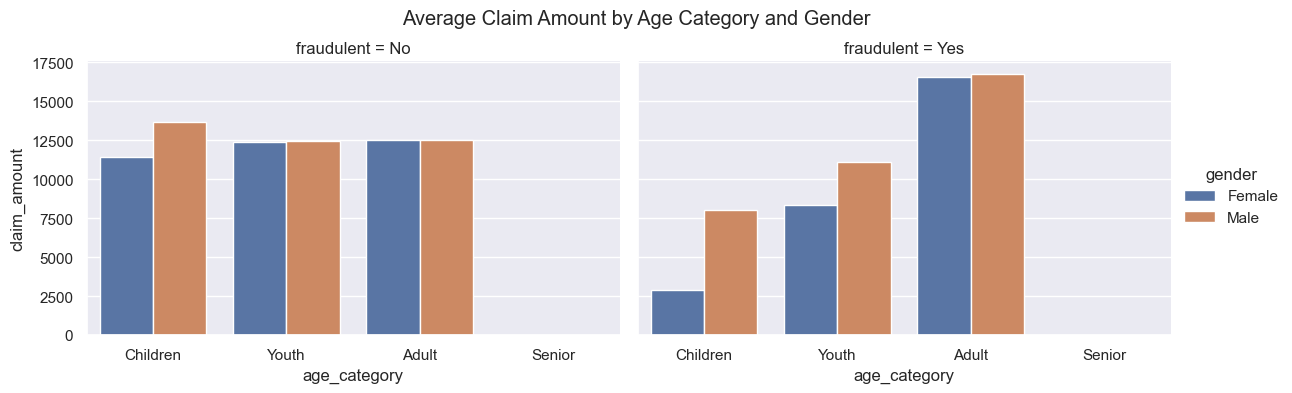

In [26]:
# Calculate average claim amount
average_claim = merged_data.groupby(['gender', 'age_category', 'fraudulent'], observed=True)['claim_amount'].mean().reset_index()

# Create catplot
g = sns.catplot(x='age_category', y='claim_amount', hue='gender', col='fraudulent', data=average_claim, kind='bar', height=4, aspect=1.5)

# Add a title to the Figure
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Average Claim Amount by Age Category and Gender')

# Show the plot
plt.show()


# HYPOTHESIS TESTING

## 16. Is there any similarity in the amount claimed by males and females?

In [27]:
from scipy.stats import ttest_ind

# Extract claim amounts for males and females
male_claims = merged_data[merged_data['gender'] == 'Male']['claim_amount']
female_claims = merged_data[merged_data['gender'] == 'Female']['claim_amount']

# Perform the t-test
t_statistic, p_value = ttest_ind(male_claims, female_claims)

# Print the p-value
print(f"The p-value is {p_value}")


The p-value is 0.33601006135365463


## 17. Is there any relationship between age category and segment?

In [28]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(merged_data['age_category'], merged_data['Segment'])

# Perform the Chi-Square Test of Independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print(f"The p-value is {p_value}")


The p-value is 0.7823228739917292


In [29]:
merged_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_category,claim_month_year
739,58878919,29323970,Driver error,2017-01-01,Auto,Unknown,Material only,1840.0,1,Yes,Male,1971-03-03,NE,783-653-9163,Gold,0,45,Adult,2017-01
181,90591192,61745840,Other driver error,2017-01-01,Home,No,Material and injury,30930.0,1,No,Female,1994-07-24,MA,612-684-5472,Platinum,1,22,Youth,2017-01
312,9476314,65176092,Other causes,2017-01-01,Auto,No,Material and injury,37290.0,3,No,Male,1975-11-23,NC,651-379-2486,Silver,1,41,Adult,2017-01
905,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1,No,Female,1993-08-13,TN,396-973-2531,Gold,1,23,Youth,2017-01
120,39131766,39587790,Other causes,2017-01-01,Auto,No,Material only,2967.0,1,Yes,Male,2065-01-10,LA,615-154-3516,Gold,0,-49,NaN,2017-01


## 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [30]:
# Filter data for 2018
data_2018 = merged_data[merged_data['claim_date'].dt.year == 2018]

# Conduct one-sample t-test with population mean $10,000
t_stat, p_val = stats.ttest_1samp(data_2018['claim_amount'], 10000)

# Print p-value
print(f'p-value: {p_val}')


p-value: 9.43584422198333e-06


## 19. Is there any difference between age groups and insurance claims?

In [32]:
# Import necessary libraries
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(merged_data['age_category'], merged_data['total_policy_claims'])

# Perform the Chi-Square Test of Independence
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print(f'p-value: {p_val}')

p-value: 0.00043617876194776254


## 20. Is there any relationship between total number of policy claims and claimed amount??

In [33]:
# Import necessary libraries
import scipy.stats

# Calculate the Pearson correlation coefficient
correlation, p_val = scipy.stats.pearsonr(merged_data['total_policy_claims'], merged_data['claim_amount'])

# Print the correlation and p-value
print(f'Correlation: {correlation}')
print(f'p-value: {p_val}')

Correlation: -0.02310650211712445
p-value: 0.44852598282220046
